In [1]:
#check here at Xe data: integ_wf = -1.*wf_led[ch][:, integ_range_idx[0]:integ_range_idx[1]].sum(axis=1)

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 


In [3]:
labels = ['PN2304-1470 (small)', 'H11901P-04 (small)', 'PN2304-1470 (medium)', 'H11901P-04 (medium)', 'PN2304-1470 (large)', 'H11901P-04 (large)']

wavelength = [0, # pedestal
              360, 370, 375, 380, 385, 390, 400]

files = [
    [
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_pedestal_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_360nm-2_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_370nm-2_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_375nm-2_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_380nm-2_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_385nm-2_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_390nm-2_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_400nm-2_wforms.feather'
    ],
    [
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_pedestal_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_360nm_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_370nm_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_375nm_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_380nm_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_385nm_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_390nm_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_400nm_wforms.feather'
    ],
    [
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_pedestal_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_360nm-4_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_370nm-4_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_375nm-4_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_380nm-4_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_385nm-4_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_390nm-4_wforms.feather',
    '../../data/2024-02-21_Xe/CH1_NNVT_PN2304-1470_1108v_CH2_H11901P-04_1.08v_400nm-4_wforms.feather'
    ]

]

In [4]:
tres=4. #4 ns
vres=2.0/(2**12)*1000. #mV
#labels=['PN2304-1470', 'H11901P-04']
#data=pd.read_feather('./data/2024-02-16_Xe/CH0_HAM_KM56206_1058v_CH1_H11901P-04_1.08v_400nm_50Hz_wforms.feather')
#data

In [5]:
wf = []
for i in range(len(wavelength)):
    for j in range(len(files)):
        df = pd.read_feather(files[j][i])
        wf.append(np.vstack(df['1'].values)*vres)
        wf.append(np.vstack(df['2'].values)*vres)
len(wf)

48

In [6]:
print(wf[0].shape)

(10010, 2048)


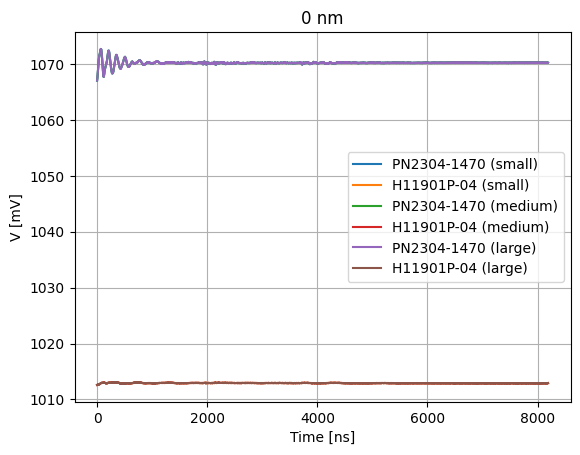

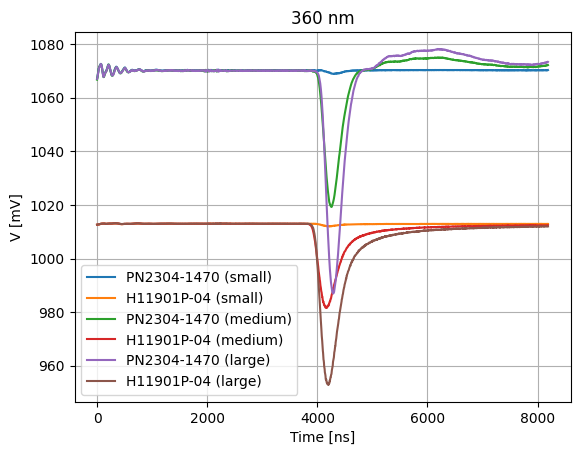

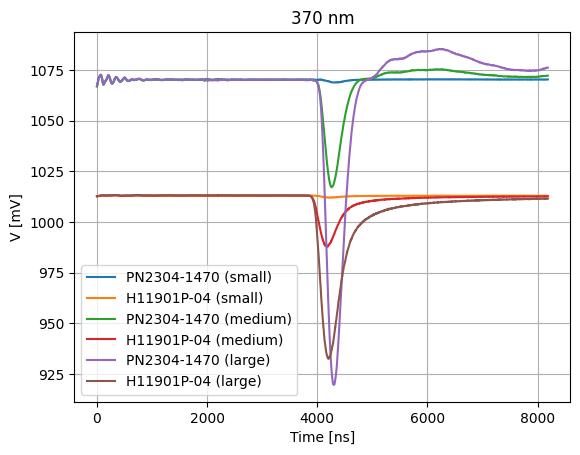

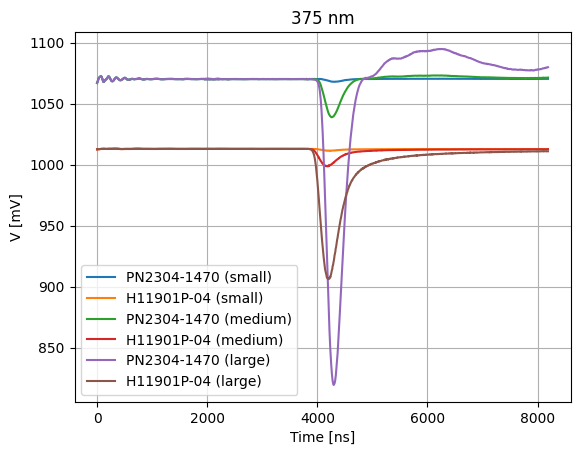

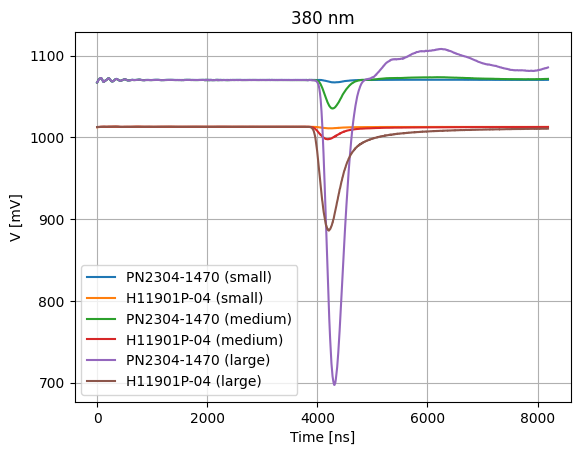

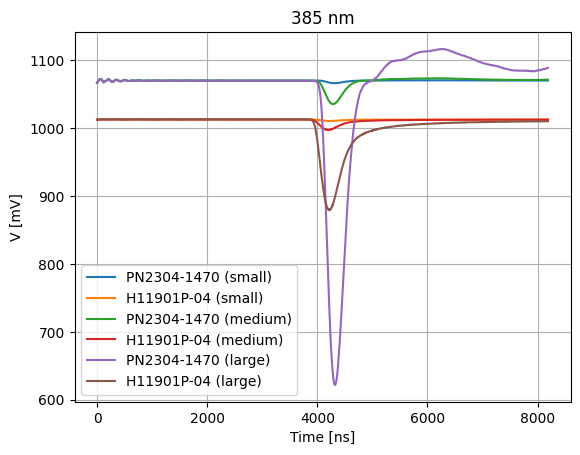

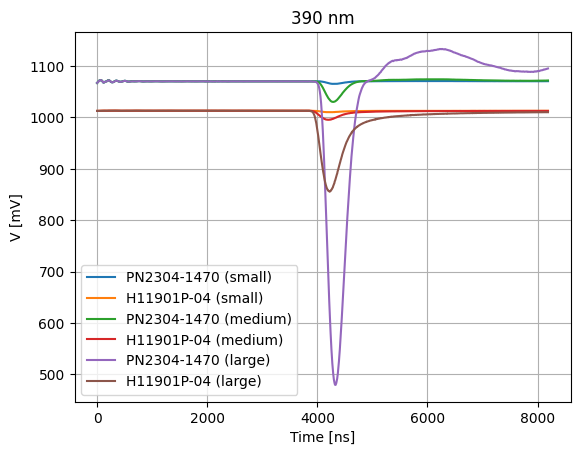

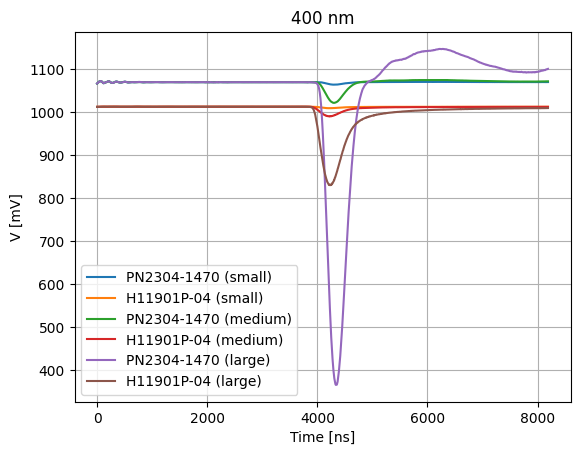

In [7]:
time=np.array([i*tres for i in range(wf[0].shape[1])])

for i in range(len(wavelength)):
    n=len(labels)
    for ch in range(n):
        plt.title('{:d} nm'.format(wavelength[i]))
        plt.plot(time, wf[i*n+ch].mean(axis=0), label=labels[ch])
    plt.grid()
    plt.ylabel('V [mV]')
    plt.xlabel('Time [ns]')
    plt.legend()
    plt.show()

In [8]:
for i in range(len(files[0])):
    n=len(labels)
    for ch in range(n):
        head = wf[i*n+ch][:,500:875] # 2000:3500 ns
        #baseline = head[(head[:,-1]<(head.mean(axis=1)+head.std(axis=1)*10)) * (head[:,-1]>(head.mean(axis=1)-head.std(axis=1)*10))].mean(axis=1)
        baseline = head.mean(axis=1)
        wf[i*n+ch] = wf[i*n+ch] - baseline[:,None]

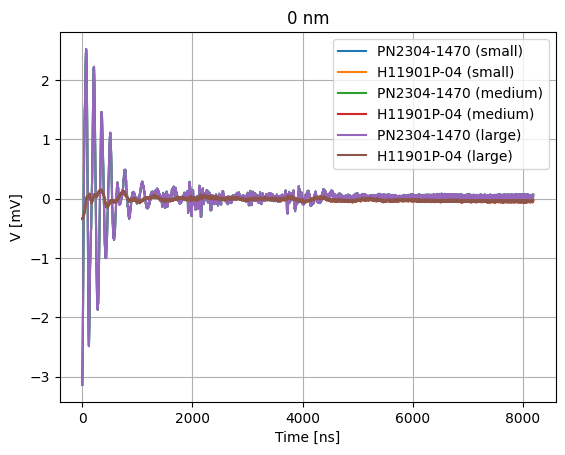

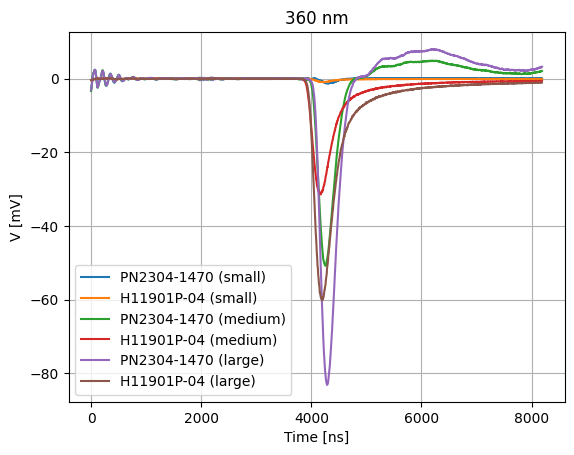

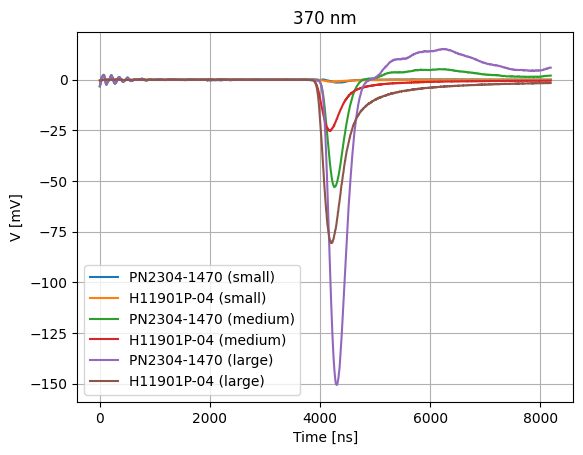

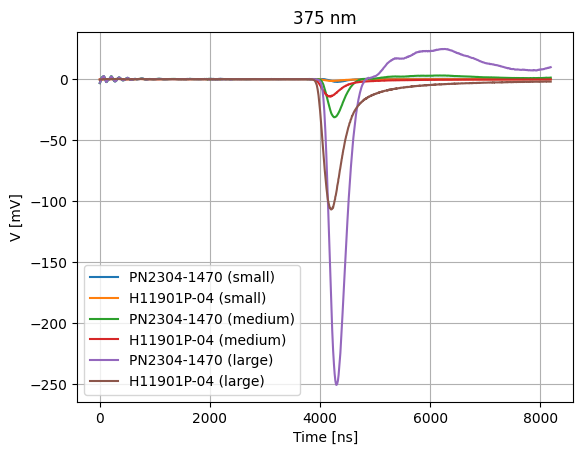

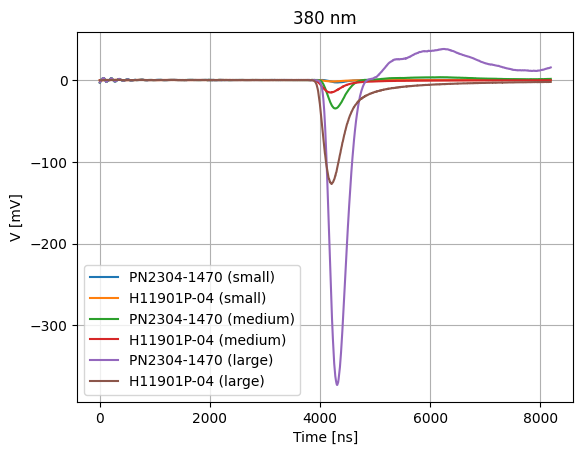

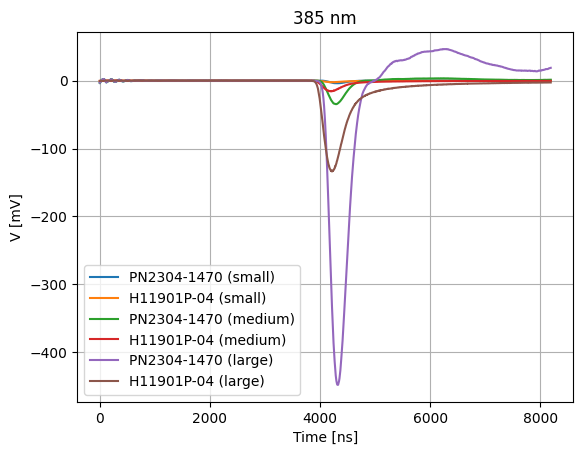

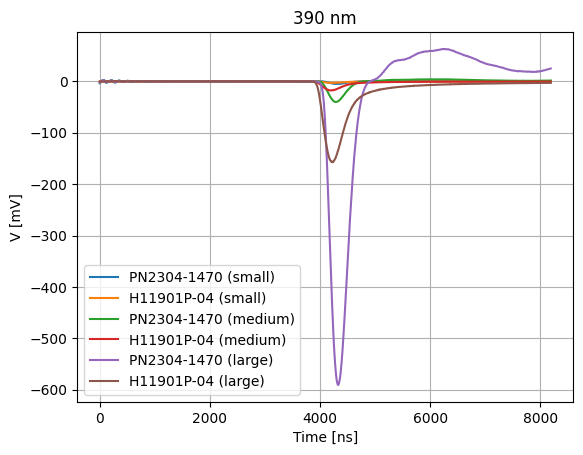

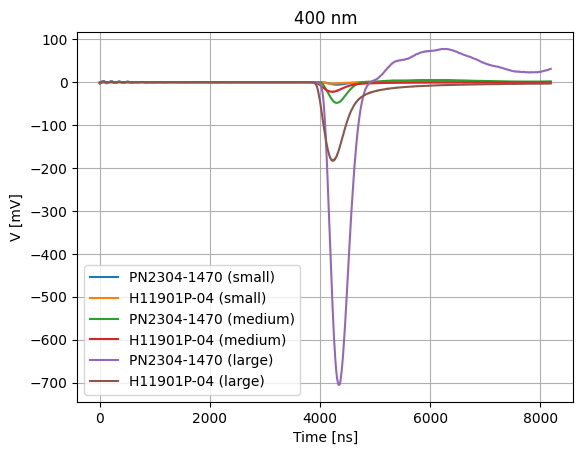

In [9]:
average_wf = []
for i in range(len(wavelength)):
    n=len(labels)
    for ch in range(n):
        average_wf.append(wf[i*n+ch].mean(axis=0))
        plt.title('{:d} nm'.format(wavelength[i]))
        plt.plot(time, wf[i*n+ch].mean(axis=0), label=labels[ch])
    
    plt.grid()
    plt.ylabel('V [mV]')
    plt.xlabel('Time [ns]')
    plt.legend()
    plt.show()

/tmp/ipykernel_3165958/849843498.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


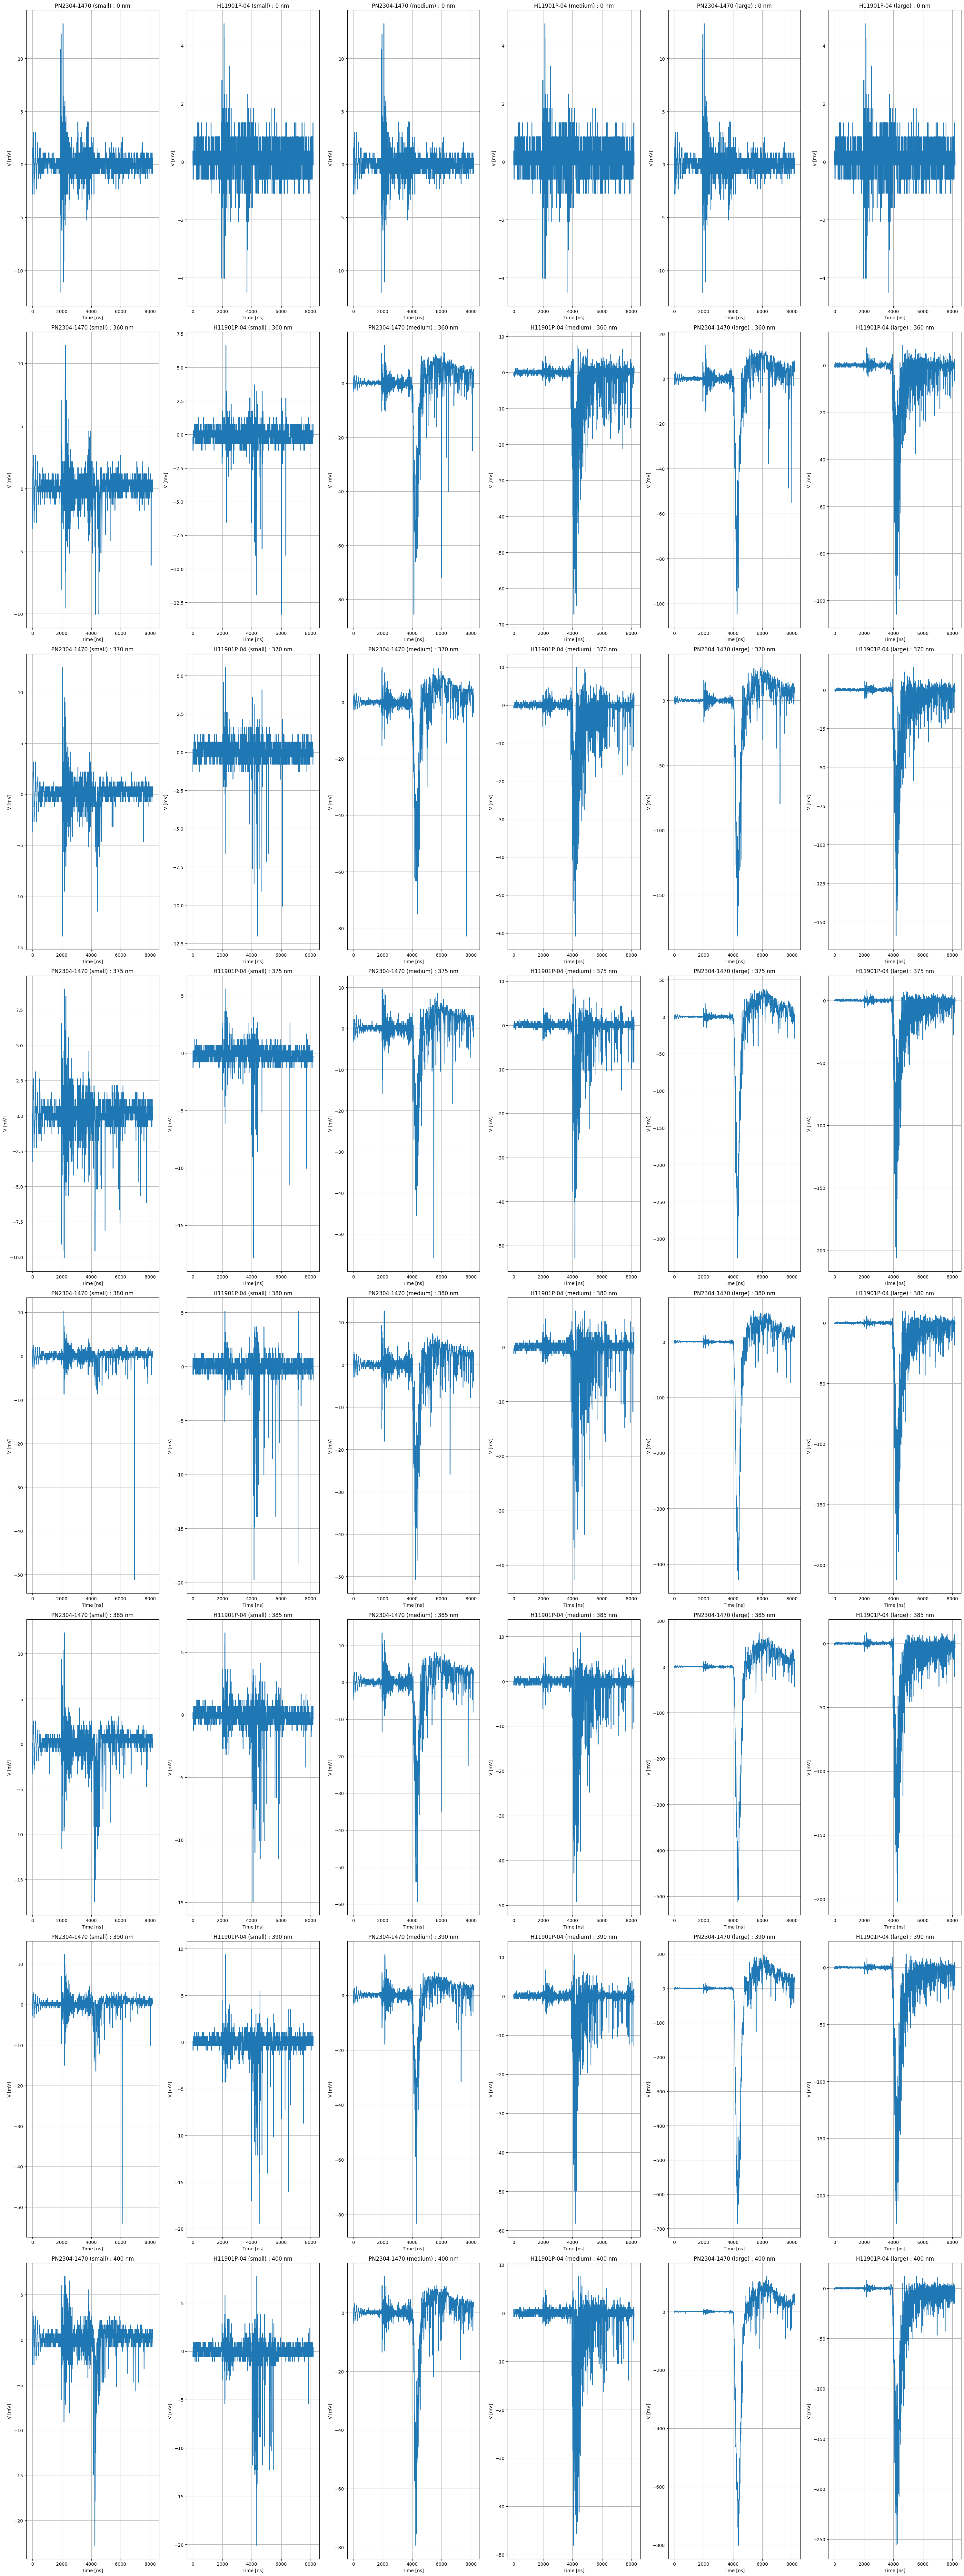

In [10]:
fig, ax = plt.subplots(len(wavelength), len(labels), figsize=[30,80])
for i in range(len(wavelength)):
    n=len(labels)
    for ch in range(n):
        title=labels[ch]+' : '+str(wavelength[i])+' nm'
        ax[i,ch].set_title(title)
        ax[i,ch].plot(time, wf[i*n+ch][0]) # 1st wf
        ax[i,ch].set_xlabel('Time [ns]')
        ax[i,ch].set_ylabel('V [mV]')
        ax[i,ch].grid()
fig.tight_layout()
fig.show()

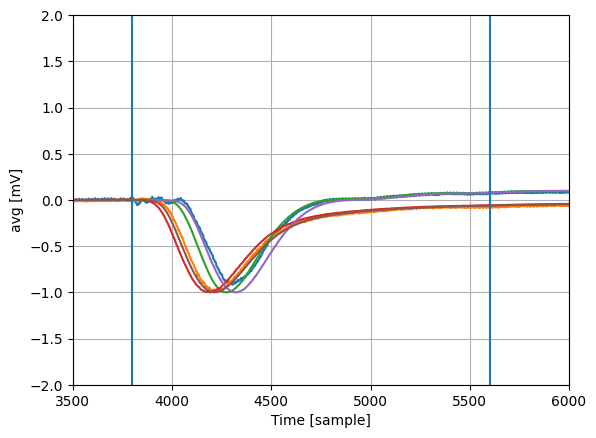

In [11]:
n=len(labels)
average_all_wf = []
for ch in range(len(labels)):
    average_all_wf.append([ average_wf[i*n+ch] for i in range(len(wavelength)) ])
for ch in range(len(labels)):
    average_all_wf[ch] = np.vstack(average_all_wf[ch]).mean(axis=0)
    plt.plot(time, -1*average_all_wf[ch]/average_all_wf[ch].min(), label=labels[ch])
    
plt.axvline(3800) # start ref. +80 for 3inch pmt
plt.axvline(5600) #nnvt
plt.axvline(2100) #hpk
plt.ylabel('avg [mV]')
plt.xlabel('Time [sample]')
plt.ylim([-2, 2])
plt.xlim([3500,6000])
plt.grid()
#plt.legend(loc='lower right')
plt.show()

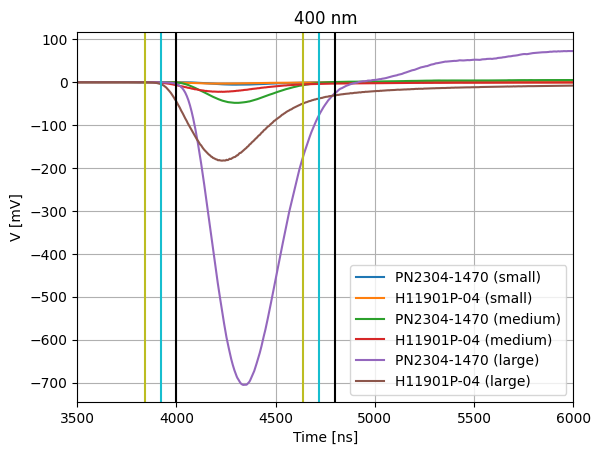

In [12]:
idx_400nm=7
n=len(labels)
plt.title('{:d} nm'.format(wavelength[idx_400nm]))
for ch in range(n):
    plt.plot(time, wf[idx_400nm*n+ch].mean(axis=0), label=labels[ch])
#plt.axvline(3800) # start ref. +80 for 3inch pmt
#plt.axvline(4700) # 3inch pmt
#plt.axvline(4100)
plt.axvline(3840, color='C8')
plt.axvline(4640, color='C8')
plt.axvline(3920, color='C9')
plt.axvline(4720, color='C9')
plt.axvline(4000, color='black')
plt.axvline(4800, color='black')
plt.xlabel('Time [ns]')
plt.ylabel('V [mV]')
plt.xlim([3500, 6000])
plt.grid()
plt.legend()
plt.show()

In [13]:
integ_ranges = []
# pedestal temporary
integ_ranges = [[4000,4800], [3920,4720],
                [3920,4720], [3840,4640],
                [4000,4800], [3920,4720],
                [4000,4800], [3920,4720]
               ]

tmp_cut = [3500, 6000]
n=len(labels)
for i in range(1,len(wavelength)):
    for ch in range(n):
        #print(i,ch)
        avg_wf=wf[i*n+ch].mean(axis=0)[int(tmp_cut[0]/tres) : int(tmp_cut[1]/tres) ]

        peak_i = avg_wf.argmin()
        pre_peak = avg_wf[:peak_i]
        pro_peak = avg_wf[peak_i:]
        peak = avg_wf.min()

        rising = np.argwhere(pre_peak>0.1*peak)[-1][0]
        falling= np.argwhere(pro_peak>0.75*peak)[0][0] if not np.isnan(np.argwhere(pro_peak>0.1*peak).mean()) else 5000 # tmp
        #falling= 0 #peak
    
        
        integ_ranges.append( [tmp_cut[0]+rising*tres, tmp_cut[0]+(falling+peak_i)*tres] )


In [14]:
print(len(integ_ranges))

50


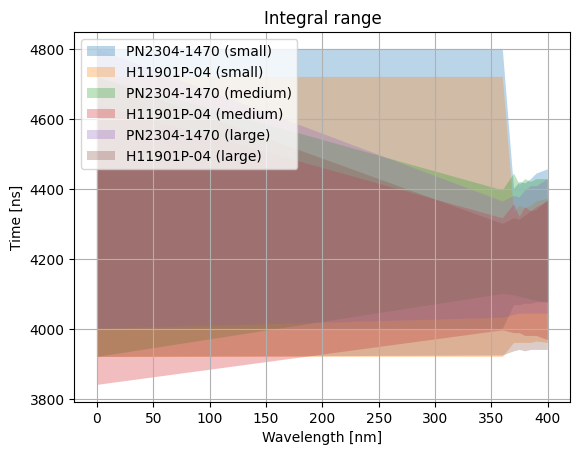

In [15]:
n=len(labels)
for ch in range(n):
    integ_range_select_ch = np.vstack([ integ_ranges[i*n+ch] for i in range(len(wavelength)) ] )
    plt.fill_between(wavelength, integ_range_select_ch[:,0], integ_range_select_ch[:,1], alpha=0.3, label=labels[ch])

plt.title('Integral range')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Time [ns]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [16]:
def gaussian(x, amp, loc, sig):
    return amp*np.exp(-np.power(x - loc, 2.) / (2 * np.power(sig, 2.)))

[4000, 4800]
[3920, 4720]
[3920, 4720]
[3840, 4640]
[4000, 4800]
[3920, 4720]


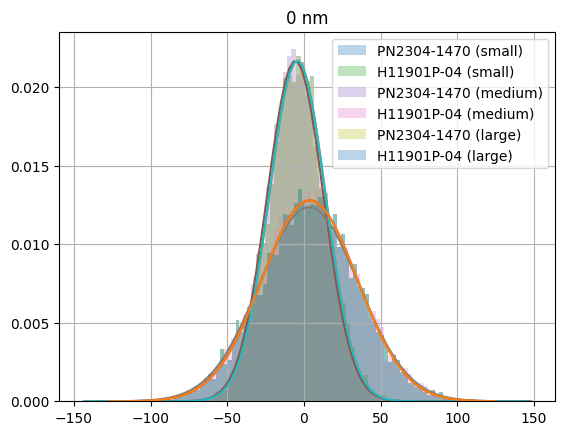

[4000, 4800]
[3920, 4720]
[4100.0, 4396.0]
[3996.0, 4316.0]
[4032.0, 4364.0]
[3924.0, 4300.0]


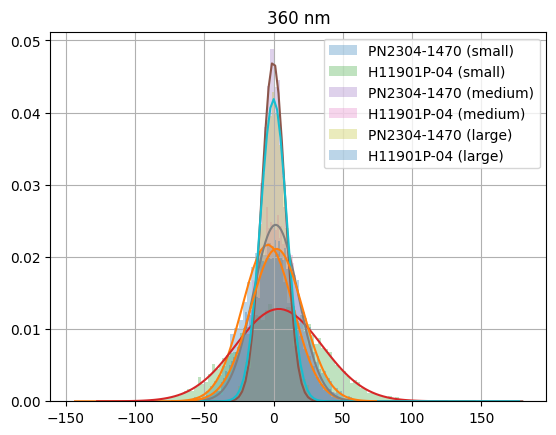

[4068.0, 4400.0]
[3960.0, 4332.0]
[4096.0, 4444.0]
[3988.0, 4356.0]
[4040.0, 4380.0]
[3936.0, 4316.0]


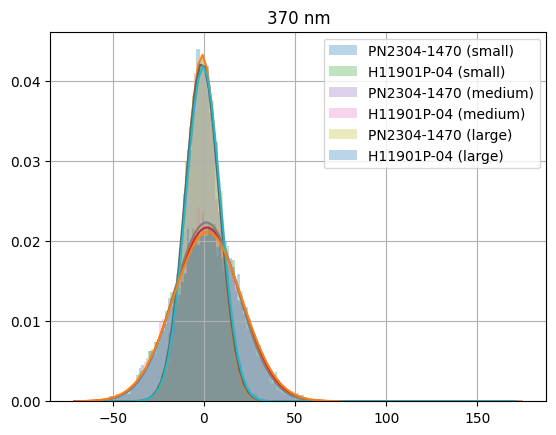

[4068.0, 4420.0]
[3960.0, 4352.0]
[4092.0, 4412.0]
[3988.0, 4320.0]
[4044.0, 4376.0]
[3940.0, 4312.0]


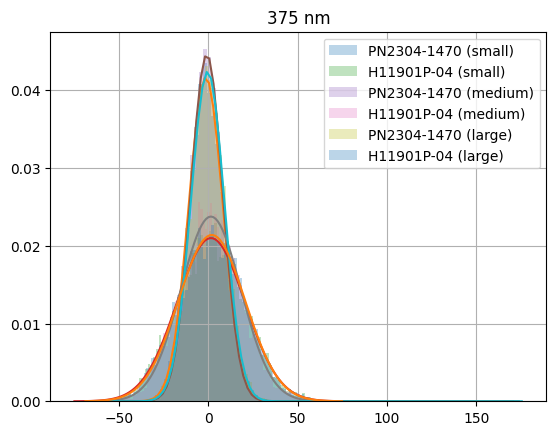

[4072.0, 4416.0]
[3960.0, 4344.0]
[4088.0, 4428.0]
[3980.0, 4348.0]
[4044.0, 4396.0]
[3936.0, 4324.0]


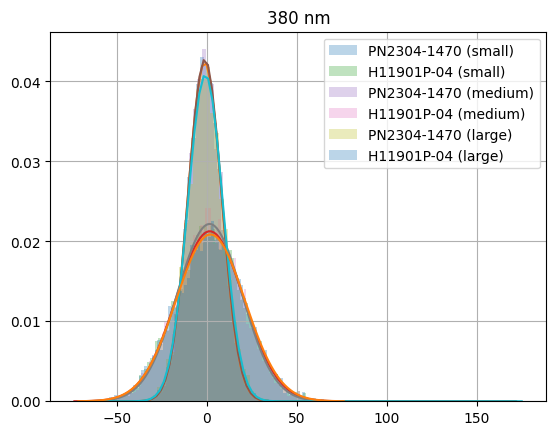

[4072.0, 4428.0]
[3960.0, 4352.0]
[4084.0, 4420.0]
[3980.0, 4336.0]
[4044.0, 4408.0]
[3940.0, 4336.0]


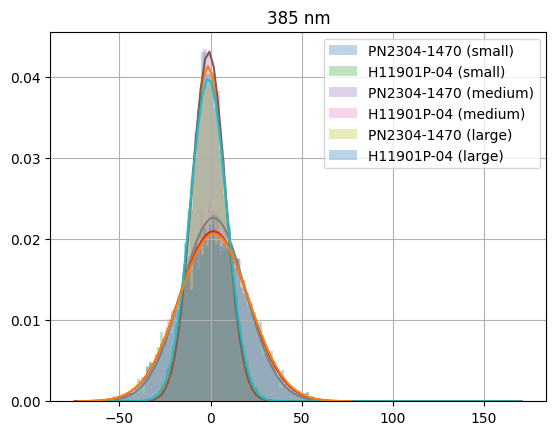

[4076.0, 4444.0]
[3964.0, 4364.0]
[4080.0, 4428.0]
[3980.0, 4348.0]
[4044.0, 4408.0]
[3940.0, 4340.0]


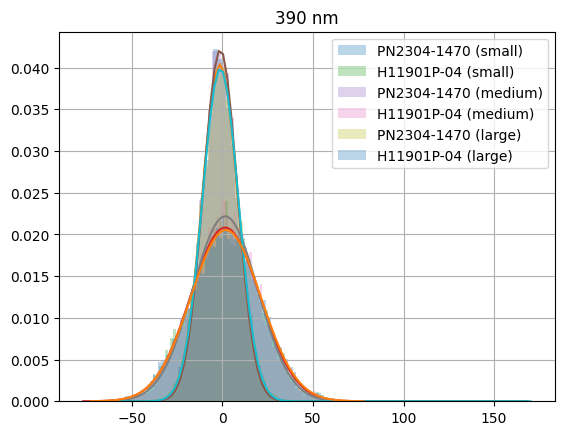

[4076.0, 4456.0]
[3960.0, 4372.0]
[4076.0, 4428.0]
[3968.0, 4364.0]
[4044.0, 4428.0]
[3940.0, 4368.0]


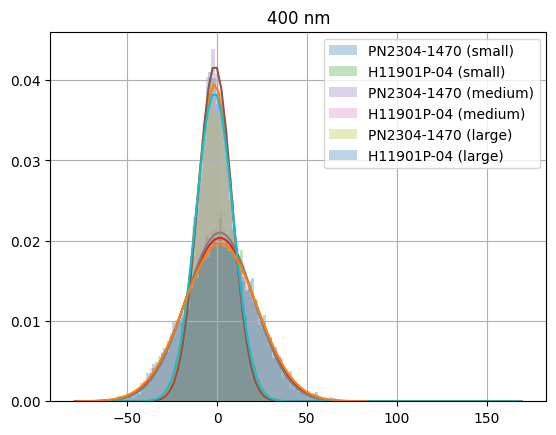

In [17]:
mean_integ_wf_pedestal = []
std_integ_wf_pedestal = []
mean_gaus_integ_wf_pedestal = []
std_gaus_integ_wf_pedestal = []

for i in range(len(wavelength)):
    n=len(labels)
    for ch in range(n):
        integ_range = integ_ranges[i*n+ch]
        print(integ_range)
        
        integ_range_idx = [ int(integ_range[0]/tres), int(integ_range[1]/tres) ]
        integ_wf_pedestal = -1.*wf[ch][:,integ_range_idx[0]:integ_range_idx[1]].sum(axis=1)
        mean_integ_wf_pedestal_tmp = integ_wf_pedestal.mean()
        std_integ_wf_pedestal_tmp = integ_wf_pedestal.std()
        mean_integ_wf_pedestal.append(mean_integ_wf_pedestal_tmp)
        std_integ_wf_pedestal.append(std_integ_wf_pedestal_tmp)

        plt.title('{:d} nm'.format(wavelength[i]))
        histogram = plt.hist(integ_wf_pedestal, bins=100, label=labels[ch], alpha=0.3, density=True)

        x_hist = (histogram[1][1:]+histogram[1][0:-1])/2.0
        y_hist = histogram[0]
        p0=[y_hist.max(), mean_integ_wf_pedestal_tmp, std_integ_wf_pedestal_tmp]
        p, pconv = curve_fit(gaussian, x_hist, y_hist, p0=p0) #sigma=sigma, bounds=bounds)
        mean_integ_wf_pedestal_tmp = p[1]
        std_integ_wf_pedestal_tmp = p[2]
        mean_gaus_integ_wf_pedestal.append(mean_integ_wf_pedestal_tmp)
        std_gaus_integ_wf_pedestal.append(std_integ_wf_pedestal_tmp)
        
        fit=gaussian(x_hist,p[0],p[1],p[2])
        plt.plot(x_hist, fit)
    
    plt.grid()
    plt.legend()
    plt.show()
    

[4000, 4800]
[3920, 4720]
[3920, 4720]
[3840, 4640]
[4000, 4800]
[3920, 4720]


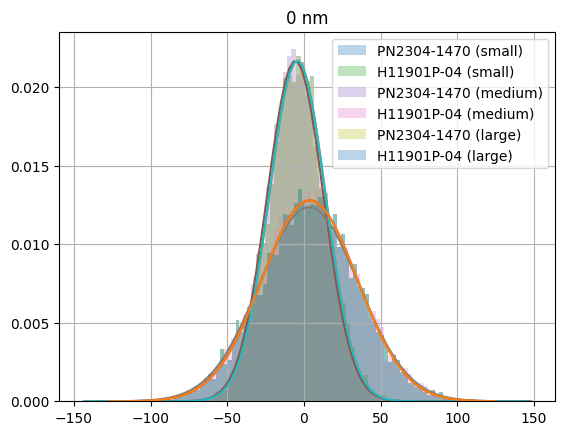

[4000, 4800]
[3920, 4720]
[4100.0, 4396.0]
[3996.0, 4316.0]
[4032.0, 4364.0]
[3924.0, 4300.0]


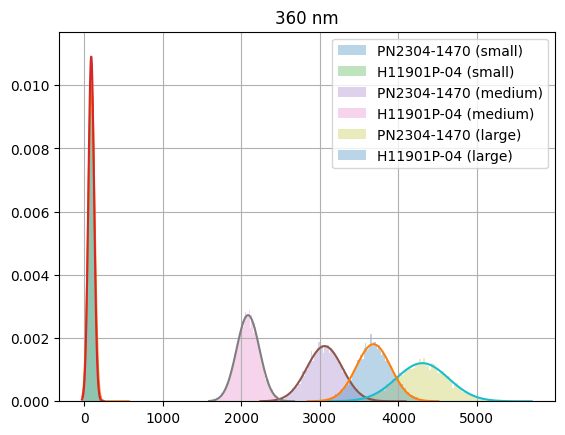

[4068.0, 4400.0]
[3960.0, 4332.0]
[4096.0, 4444.0]
[3988.0, 4356.0]
[4040.0, 4380.0]
[3936.0, 4316.0]


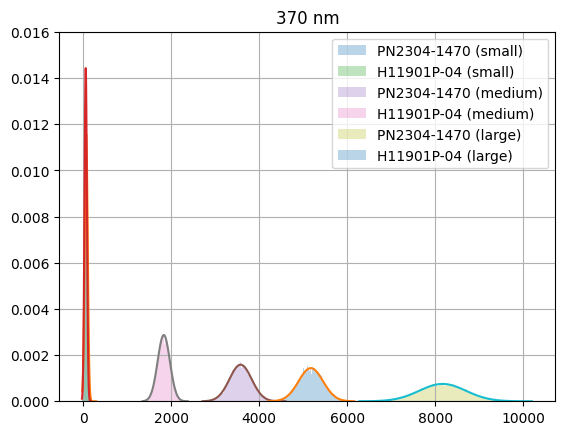

[4068.0, 4420.0]
[3960.0, 4352.0]
[4092.0, 4412.0]
[3988.0, 4320.0]
[4044.0, 4376.0]
[3940.0, 4312.0]


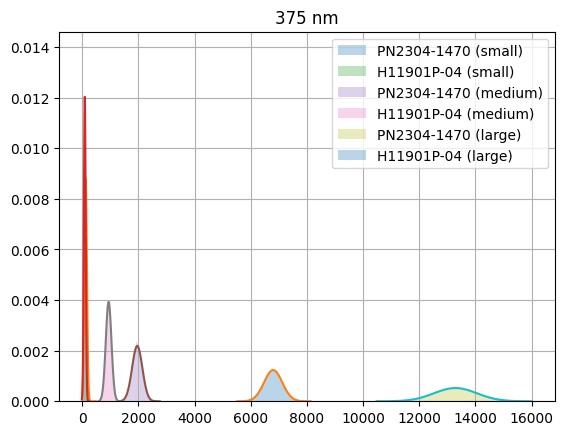

[4072.0, 4416.0]
[3960.0, 4344.0]
[4088.0, 4428.0]
[3980.0, 4348.0]
[4044.0, 4396.0]
[3936.0, 4324.0]


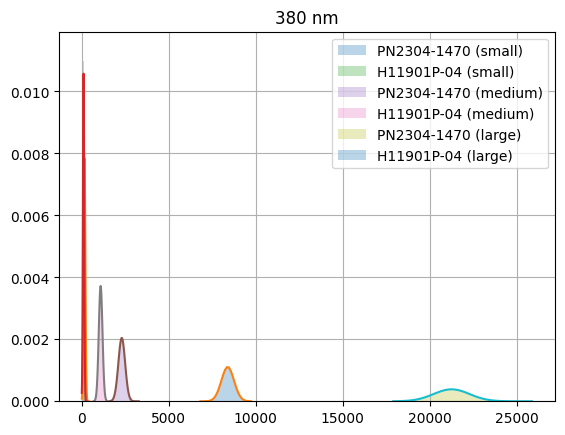

[4072.0, 4428.0]
[3960.0, 4352.0]
[4084.0, 4420.0]
[3980.0, 4336.0]
[4044.0, 4408.0]
[3940.0, 4336.0]


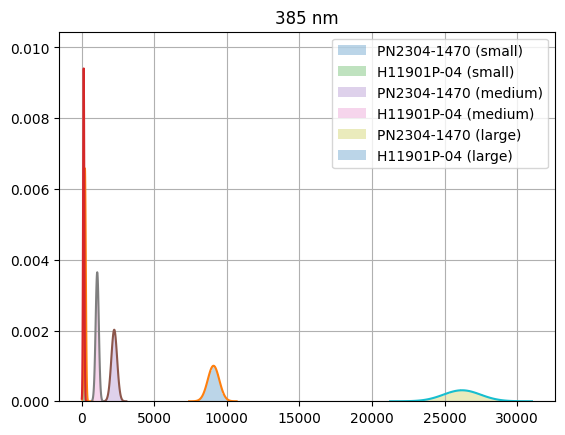

[4076.0, 4444.0]
[3964.0, 4364.0]
[4080.0, 4428.0]
[3980.0, 4348.0]
[4044.0, 4408.0]
[3940.0, 4340.0]


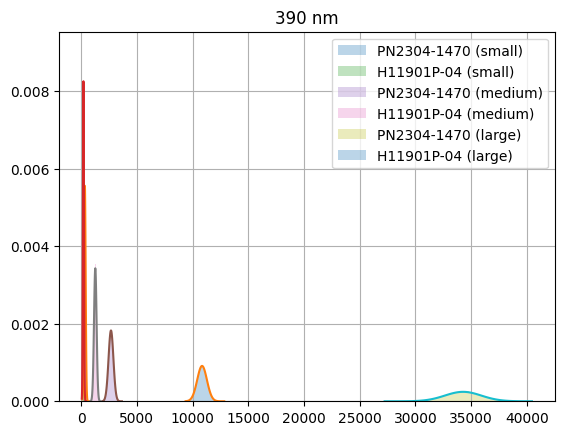

[4076.0, 4456.0]
[3960.0, 4372.0]
[4076.0, 4428.0]
[3968.0, 4364.0]
[4044.0, 4428.0]
[3940.0, 4368.0]


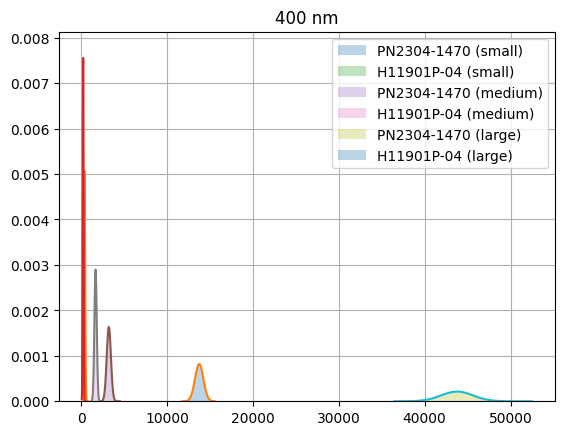

In [18]:
#integ_ranges = [[4000,4800], [3920,4720],
#                [3920,4720], [3840,4640],
#                [4000,4800], [3920,4720],
#                [4000,4800], [3920,4720]
#               ]

mean_integ_wf = []
std_integ_wf = []
mean_gaus_integ_wf = []
std_gaus_integ_wf = []

for i in range(len(wavelength)):
    n=len(labels)
    for ch in range(n):
        #if ch%2 == 0:
        #    integ_range = integ_range_3inch
        #else:
        #    integ_range = integ_range_ref
        integ_range = integ_ranges[i*n+ch]
        print(integ_range)
        
        integ_range_idx = [ int(integ_range[0]/tres), int(integ_range[1]/tres) ]
        #integ_range_idx = integ_range
        integ_wf = -1.*wf[i*n+ch][:,integ_range_idx[0]:integ_range_idx[1]].sum(axis=1)
        mean_integ_wf_tmp = integ_wf.mean()
        std_integ_wf_tmp = integ_wf.std()
        mean_integ_wf.append(mean_integ_wf_tmp)
        std_integ_wf.append(std_integ_wf_tmp)

        plt.title('{:d} nm'.format(wavelength[i]))
        histogram = plt.hist(integ_wf, bins=100, label=labels[ch], alpha=0.3, density=True)

        x_hist = (histogram[1][1:]+histogram[1][0:-1])/2.0
        y_hist = histogram[0]
        p0=[y_hist.max(), mean_integ_wf_tmp, std_integ_wf_tmp]
        p, pconv = curve_fit(gaussian, x_hist, y_hist, p0=p0) #sigma=sigma, bounds=bounds)
        mean_integ_wf_tmp = p[1]
        std_integ_wf_tmp = p[2]
        mean_gaus_integ_wf.append(mean_integ_wf_tmp)
        std_gaus_integ_wf.append(std_integ_wf_tmp)
        
        fit=gaussian(x_hist,p[0],p[1],p[2])
        plt.plot(x_hist, fit)
    
    plt.grid()
    plt.legend()
    plt.show()


In [19]:
def calc_err(x, y, method='+'):
    z = 0.
    zerr = 0.

    if method == '+':
        z = x[0] + y[0]
        zerr = np.sqrt(x[1]**2 + y[1]**2)
    if method == '-':
        z = x[0] - y[0]
        zerr = np.sqrt(x[1]**2 + y[1]**2)
    if method == '*':
        z = x[0] * y[0]
        zerr = np.sqrt( (x[0]*y[1])**2 + (y[0]*x[1])**2 )
    if method == '/':
        z = x[0] / y[0]
        zerr = np.sqrt( (x[1]/y[0])**2 + ((x[0]*y[1])/(y[0]**2))**2 )

    return [z, zerr]

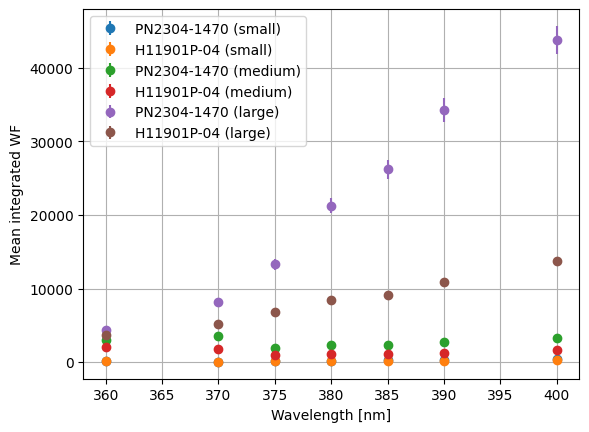

In [20]:
n=len(labels)
nwl= len(wavelength)
mean_integ_wf_chs = [] # sort and subtract pedestal 
std_integ_wf_chs = []
for ch in range(n):
    select = [i*n+ch for i in range(1,nwl)]
    mean_integ_wf_selected, std_integ_wf_selected = np.split(np.vstack([calc_err([mean_integ_wf[i], std_integ_wf[i]], [mean_integ_wf_pedestal[i], std_integ_wf_pedestal[i]], method='-') for i in select ]), 2, axis=1) #subtract pedestal
    mean_integ_wf_chs.append(mean_integ_wf_selected.flatten())
    std_integ_wf_chs.append(std_integ_wf_selected.flatten())
    plt.errorbar(x=wavelength[1:], y=mean_integ_wf_selected.flatten(), yerr=std_integ_wf_selected.flatten(), fmt='o', label=labels[ch])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Mean integrated WF')
plt.grid()
plt.legend()

plt.show()


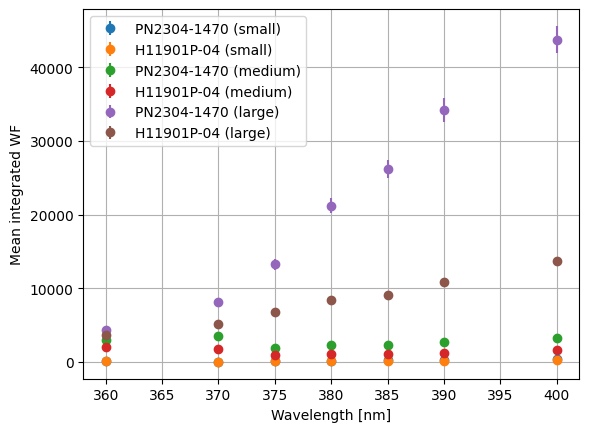

In [21]:
n=len(labels)
nwl= len(wavelength)
mean_gaus_integ_wf_chs = [] # sort and subtract pedestal 
std_gaus_integ_wf_chs = []
for ch in range(n):
    select = [i*n+ch for i in range(1,nwl)]
    mean_gaus_integ_wf_selected, std_gaus_integ_wf_selected = np.split(np.vstack([calc_err([mean_gaus_integ_wf[i], std_gaus_integ_wf[i]], [mean_gaus_integ_wf_pedestal[i], std_gaus_integ_wf_pedestal[i]], method='-') for i in select ]), 2, axis=1) #subtract pedestal
    mean_gaus_integ_wf_chs.append(mean_gaus_integ_wf_selected.flatten())
    std_gaus_integ_wf_chs.append(std_gaus_integ_wf_selected.flatten())
    plt.errorbar(x=wavelength[1:], y=mean_gaus_integ_wf_selected.flatten(), yerr=std_gaus_integ_wf_selected.flatten(), fmt='o', label=labels[ch])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Mean integrated WF')
plt.grid()
plt.legend()

plt.show()

### QE ###

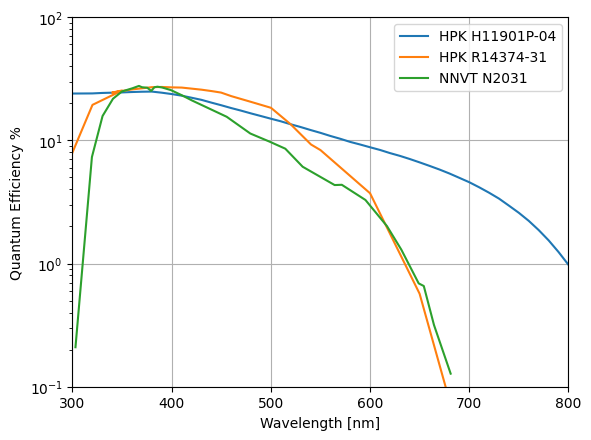

In [22]:
csv_ref= pd.read_csv('../qe/Sensitivity_H11901-04_from_Hamamatsu.csv')
wavelength_ref = csv_ref['WAVE LENGTH (nm)'].values #[nm]
sensitivity_ref = csv_ref['CATHODE RADIANT SENSITIVITY (mA/W)'].values #[mA/W]
qe_ref = (sensitivity_ref*1e-3 * 1240)/wavelength_ref * 100 #%

csv_ham= pd.read_csv('../qe/QE_R14374-31.csv')
wavelength_ham = csv_ham['x'].values #[nm]
qe_ham = csv_ham['y'].values #%

csv_nnvt= pd.read_csv('../qe/QE_NNVT.csv')
wavelength_nnvt = csv_nnvt['x'].values #[nm]
qe_nnvt = csv_nnvt['y'].values #%

plt.plot(wavelength_ref, qe_ref, label='HPK H11901P-04')
plt.plot(wavelength_ham, qe_ham, label='HPK R14374-31')
plt.plot(wavelength_nnvt, qe_nnvt, label='NNVT N2031')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency %')
plt.yscale('log')
plt.ylim([1e-1,1e2])
plt.xlim([300,800])
plt.grid()
plt.legend()
plt.show()


In [23]:
wavelength_qe = wavelength[1:] #[300+10*i for i in range(0,51)]
intp_qe_ref = np.interp(wavelength_qe, wavelength_ref, qe_ref)
intp_qe_ham = np.interp(wavelength_qe, wavelength_ham, qe_ham)
intp_qe_nnvt = np.interp(wavelength_qe, wavelength_nnvt, qe_nnvt)

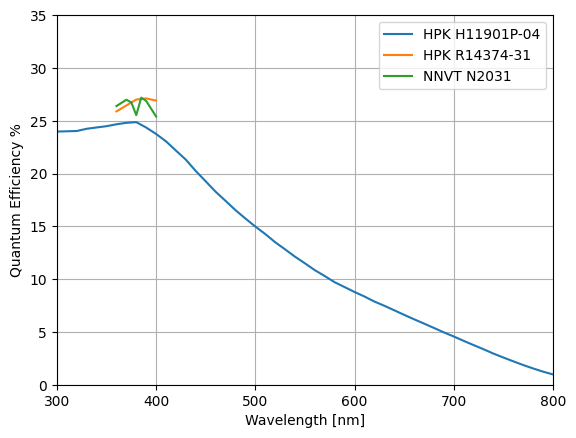

In [24]:
csv_ref= pd.read_csv('../qe/Sensitivity_H11901-04_from_Hamamatsu.csv')
wavelength_ref = csv_ref['WAVE LENGTH (nm)'].values #[nm]
sensitivity_ref = csv_ref['CATHODE RADIANT SENSITIVITY (mA/W)'].values #[mA/W]
qe_ref = (sensitivity_ref*1e-3 * 1240)/wavelength_ref * 100 #%

csv_ham= pd.read_csv('../qe/QE_R14374-31.csv')
wavelength_ham = csv_ham['x'].values #[nm]
qe_ham = csv_ham['y'].values #%

csv_nnvt= pd.read_csv('../qe/QE_NNVT.csv')
wavelength_nnvt = csv_nnvt['x'].values #[nm]
qe_nnvt = csv_nnvt['y'].values #%

plt.plot(wavelength_ref, qe_ref, label='HPK H11901P-04')
plt.plot(wavelength_qe, intp_qe_ham, label='HPK R14374-31')
plt.plot(wavelength_qe, intp_qe_nnvt, label='NNVT N2031')

plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency %')
#plt.yscale('log')
plt.ylim([0,35])
plt.xlim([300,800])
plt.grid()
plt.legend()
plt.show()

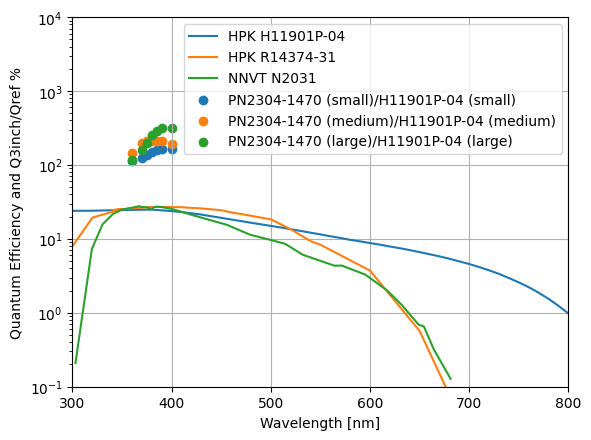

In [25]:
plt.plot(wavelength_ref, qe_ref, label='HPK H11901P-04')
plt.plot(wavelength_ham, qe_ham, label='HPK R14374-31')
plt.plot(wavelength_nnvt, qe_nnvt, label='NNVT N2031')

n=len(labels)
for i in range(int(n/2)):
    plt.scatter(wavelength[1:], 100*np.array(mean_gaus_integ_wf_chs[i*2])/np.array(mean_gaus_integ_wf_chs[i*2+1]), label=labels[i*2]+'/'+labels[i*2+1])

plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency and Q3inch/Qref %')
plt.yscale('log')
plt.ylim([1e-1,1e4])
plt.xlim([300,800])
plt.grid()
plt.legend()
plt.show()

In [26]:
#gains = [4.3, 6.7, 4.8, 6.8, 4.5, 7.5, 4.5, 7.5]
#gains     = [6.68, 4.30, 6.78, 4.69, 7.52, 4.52, 11.4, 4.06]
#gain_errs = [0.07, 0.81, 0.33, 0.42, 0.18, 1.11, 0.69, 0.48]
gains     = [7.52, 4.69, 7.52, 4.69, 7.52, 4.69]
gain_errs = [0.18, 0.42, 7.52, 4.69, 7.52, 4.69]
#gain_errs = [0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.  ]
n=len(labels)

gain_corrs = []
gain_corr_errs = []
for i in range(int(n/2)):
    v,e=calc_err( (gains[i*2+1], gain_errs[i*2+1]), (gains[i*2], gain_errs[i*2]), '/')
    gain_corrs.append(v)
    gain_corr_errs.append(e)
    
print(gain_corrs)
print(gain_corr_errs)
    
#PN2304-1470
#gain_ref=4.5
#gain_nnvt=7.5

#km56206
#gain_ref=4.3
#gain_ham=6.7

#km56213
#gain_ref=4.7
#gain_ham=6.8


[0.6236702127659576, 0.6236702127659576, 0.6236702127659576]
[0.05781171824362335, 0.8820028733417309, 0.8820028733417309]


In [27]:
# QE #
n=len(labels)
QEs = []
QE_errs = []
#for i in range(int(n/2)):
for i in range(int(n/2)):
    Qratio, Qratio_err = calc_err( (np.array(mean_gaus_integ_wf_chs[i*2]), np.array(std_gaus_integ_wf_chs[i*2])), (np.array(mean_gaus_integ_wf_chs[i*2+1]), np.array(std_gaus_integ_wf_chs[i*2+1])) , '/')
    Nratio, Nratio_err = calc_err( (Qratio, Qratio_err), (gain_corrs[i], gain_corr_errs[i]), '*')
    QEs.append(intp_qe_ref*Nratio)
    QE_errs.append(intp_qe_ref*Nratio_err)


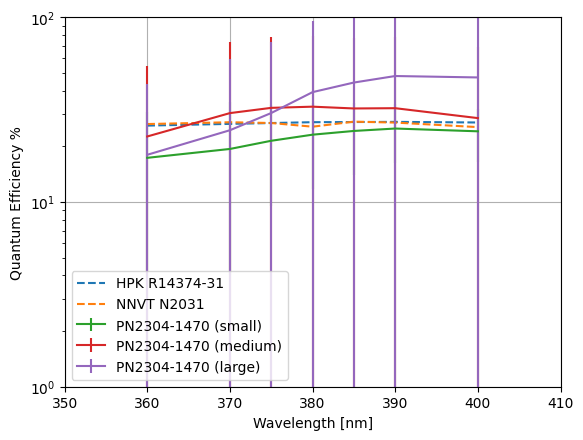

In [28]:
#plt.plot(wavelength_ref, qe_ref, label='H11901P-04')
#plt.plot(wavelength_ham, qe_ham, label='R14374-31')
#plt.plot(wavelength_nnvt, qe_nnvt, label='NNVT')
plt.plot(wavelength_qe, intp_qe_ham, label='HPK R14374-31',linestyle='--')
plt.plot(wavelength_qe, intp_qe_nnvt, label='NNVT N2031',linestyle='--')

n=len(labels)
for i in range(int(n/2)):
    #plt.scatter(wavelength[1:], np.array(gain_corrs[i]*intp_qe_ref*mean_integ_wf_chs[i*2])/np.array(mean_integ_wf_chs[i*2+1]), label=labels[i*2])
    #plt.plot(wavelength[1:], QEs[i], label=labels[i*2])
    plt.errorbar(x=wavelength[1:], y=QEs[i], yerr=QE_errs[i], label=labels[i*2])


plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency %')
plt.yscale('log')
plt.ylim([1,1e2])
plt.xlim([350,410])
plt.grid()
plt.legend(loc='lower left')
plt.show()

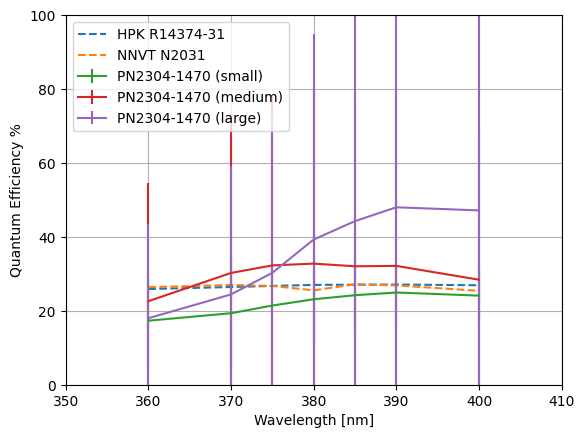

In [29]:
#plt.plot(wavelength_ham, qe_ham, label='R14374-31')
#plt.plot(wavelength_nnvt, qe_nnvt, label='NNVT')
plt.plot(wavelength_qe, intp_qe_ham, label='HPK R14374-31', linestyle='--')
plt.plot(wavelength_qe, intp_qe_nnvt, label='NNVT N2031', linestyle='--')

n=len(labels)
for i in range(int(n/2)):
    #plt.errorbar(x=wavelength[1:], y=QEs[i], yerr=QE_errs[i], label=labels[i*2])
    plt.errorbar(x=wavelength[1:], y=QEs[i], yerr=QE_errs[i], label=labels[i*2])

plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency %')
#plt.yscale('log')
plt.ylim([0,100])
plt.xlim([350,410])
plt.grid()
plt.legend(loc='upper left')
plt.show()

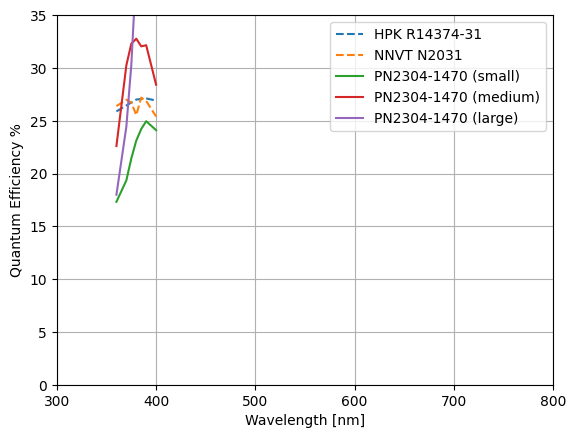

In [30]:
#plt.plot(wavelength_ham, qe_ham, label='R14374-31')
#plt.plot(wavelength_nnvt, qe_nnvt, label='NNVT')
plt.plot(wavelength_qe, intp_qe_ham, label='HPK R14374-31', linestyle='--')
plt.plot(wavelength_qe, intp_qe_nnvt, label='NNVT N2031', linestyle='--')

n=len(labels)
for i in range(int(n/2)):
    #plt.errorbar(x=wavelength[1:], y=QEs[i], yerr=QE_errs[i], label=labels[i*2])
    plt.plot(wavelength[1:], QEs[i], label=labels[i*2])

plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency %')
#plt.yscale('log')
plt.ylim([0,35])
plt.xlim([300,800])
plt.grid()
plt.legend()
plt.show()

In [31]:
print('QE at 400 nm')
n=len(labels)
for ch in range(int(n/2)):
    print('{:s} : {:.1f}%'.format(labels[ch*2], QEs[ch][-1]))

QE at 400 nm
PN2304-1470 (small) : 24.1%
PN2304-1470 (medium) : 28.4%
PN2304-1470 (large) : 47.2%


In [33]:
len(QEs[0]), len(wavelength), wavelength[-1]

(7, 8, 400)

In [34]:
intp_qe_ref = np.interp(wavelength_qe, wavelength_ref, qe_ref)
intp_qe_ham = np.interp(wavelength_qe, wavelength_ham, qe_ham)
intp_qe_nnvt = np.interp(wavelength_qe, wavelength_nnvt, qe_nnvt)

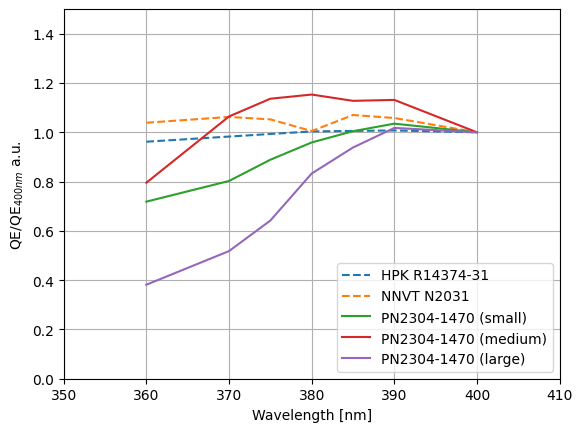

In [35]:
plt.plot(wavelength_qe, intp_qe_ham/intp_qe_ham[np.array(wavelength_qe)==400], label='HPK R14374-31', linestyle='--')
plt.plot(wavelength_qe, intp_qe_nnvt/intp_qe_nnvt[np.array(wavelength_qe)==400], label='NNVT N2031', linestyle='--')

n=len(labels)
for i in range(int(n/2)):
    plt.plot(wavelength[1:], QEs[i]/QEs[i][-1], label=labels[i*2])

plt.xlabel('Wavelength [nm]')
plt.ylabel('QE/QE$_{400nm}$ a.u.')
#plt.yscale('log')
plt.ylim([0,1.5])
plt.xlim([350,410])
plt.grid()
plt.legend()
plt.show()

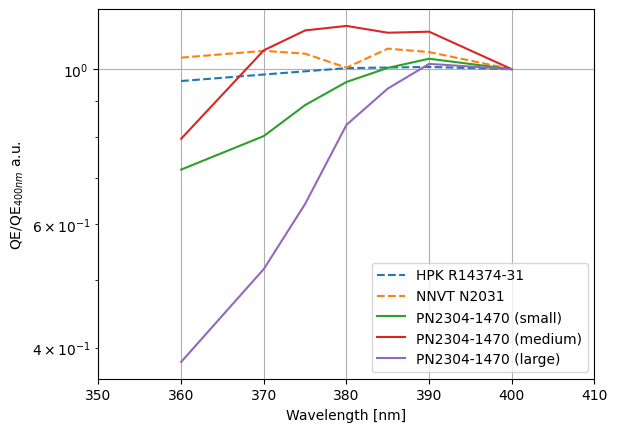

In [36]:
plt.plot(wavelength_qe, intp_qe_ham/intp_qe_ham[np.array(wavelength_qe)==400], label='HPK R14374-31', linestyle='--')
plt.plot(wavelength_qe, intp_qe_nnvt/intp_qe_nnvt[np.array(wavelength_qe)==400], label='NNVT N2031', linestyle='--')

n=len(labels)
for i in range(int(n/2)):
    plt.plot(wavelength[1:], QEs[i]/QEs[i][-1], label=labels[i*2])

plt.xlabel('Wavelength [nm]')
plt.ylabel('QE/QE$_{400nm}$ a.u.')
plt.yscale('log')
#plt.ylim([0,35])
plt.xlim([350,410])
plt.grid()
plt.legend()
plt.show()